<a href="https://colab.research.google.com/github/PhiDCH/DB/blob/master/DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate ICDAR_2015

## prepare data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir /content/icdar2015
!mkdir /content/icdar2015/train_img
!mkdir /content/icdar2015/train_gt
!mkdir /content/icdar2015/test_img
!mkdir /content/icdar2015/test_gt
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_training_images.zip -d /content/icdar2015/train_img
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_training_localization_transcription_gt.zip -d /content/icdar2015/train_gt
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_test_images.zip -d /content/icdar2015/test_img
!unzip /content/drive/MyDrive/MyComputer/icdar2015/Challenge4_Test_Task1_GT.zip -d /content/icdar2015/test_gt

## clone repo and download pretrained model

In [ ]:
!rm -rf /content/db-pytorch
!git clone https://github.com/PhiDCH/DB /content/db-pytorch/

In [ ]:
cd /content/db-pytorch

In [ ]:
!gdown --id 1HgWDMYrf-1XqlSMGSu_qxD_IAi9uJ38O -O ./pretrain/db-resnet18-ic15
!gdown --id 1NiyFjGhy0NEVtE7lbuqR9VlrH_5DZR9l -O ./pretrain/db-resnet50-ic15

In [ ]:
!pip install -r requirement.txt

In [5]:
!pip install addict

In [14]:
cd /content/db-pytorch/assets/ops/dcn/

/content/db-pytorch/assets/ops/dcn


In [ ]:
!python setup.py build_ext --inplace

In [2]:
cd /content/db-pytorch/

/content/db-pytorch


In [19]:
!mkdir datasets/
!gdown --id 1vw5VqojY0psGAeJv4513Sf-ZywJGgjgh -O /content/icdar15.zip
!unzip /content/icdar15.zip -d /content/db-pytorch/datasets/
!mkdir /content/db-pytorch/datatsets/icdar2015/train_images/
!mkdir /content/db-pytorch/datatsets/icdar2015/test_images/
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_training_images.zip -d /content/db-pytorch/datatsets/icdar2015/train_images/
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_test_images.zip -d /content/db-pytorch/datatsets/icdar2015/test_images/

## test single image

In [6]:
!CUDA_VISIBLE_DEVICES=0 python demo.py experiments/seg_detector/ic15_resnet50_deform_thre.yaml \
--image_path test_img/sample.jpg \
--resume pretrain/db-resnet50-ic15 \
--polygon --box_thresh 0.6 --visualize

verbose: True
Initializing log dir for workspace/SegDetectorModel-seg_detector/deformable_resnet50/L1BalanceCELoss
./datasets/icdar2015/
Resuming from pretrain/db-resnet50-ic15
Resumed from pretrain/db-resnet50-ic15


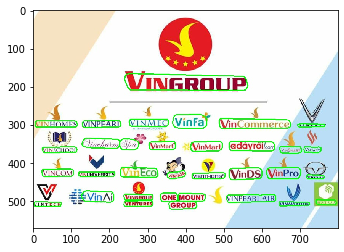

In [12]:
import cv2 
from matplotlib import pyplot as plt 
temp = cv2.imread('demo_results/sample.jpg')
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
plt.imshow(temp)

## evaluate on icdar2015

In [7]:
!CUDA_VISIBLE_DEVICES=0 python eval.py experiments/seg_detector/ic15_resnet50_deform_thre.yaml \
--resume pretrain/db-resnet50-ic15 \
--box_thresh 0.6

./datasets/icdar2015/
[INFO] [2021-03-11 09:42:28,301] Resuming from pretrain/db-resnet50-ic15
[INFO] [2021-03-11 09:42:28,393] Resumed from pretrain/db-resnet50-ic15
100% 500/500 [00:56<00:00,  8.81it/s]
[INFO] [2021-03-11 09:43:25,745] precision : 0.912924 (500)
[INFO] [2021-03-11 09:43:25,745] recall : 0.802600 (500)
[INFO] [2021-03-11 09:43:25,745] fmeasure : 0.854215 (1)


# Train DB model

## prepare data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/icdar2015
!mkdir /content/icdar2015/train_img
!mkdir /content/icdar2015/train_gt
!mkdir /content/icdar2015/test_img
!mkdir /content/icdar2015/test_gt
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_training_images.zip -d /content/icdar2015/train_img
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_training_localization_transcription_gt.zip -d /content/icdar2015/train_gt
!unzip /content/drive/MyDrive/MyComputer/icdar2015/ch4_test_images.zip -d /content/icdar2015/test_img
!unzip /content/drive/MyDrive/MyComputer/icdar2015/Challenge4_Test_Task1_GT.zip -d /content/icdar2015/test_gt

In [1]:
!rm -rf /content/db-pytorch/
!git clone https://github.com/WenmuZhou/DBNet.pytorch /content/db-pytorch

Cloning into '/content/db-pytorch'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1068 (delta 27), reused 46 (delta 17), pack-reused 993
Receiving objects: 100% (1068/1068), 1.36 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (607/607), done.


In [3]:
cd /content/db-pytorch/

/content/db-pytorch


In [ ]:
!pip install -r requirement.txt